In [49]:
import pandas as pd, numpy as np
import warnings
warnings.filterwarnings('ignore')

houses = pd.read_csv('data/train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [50]:
rows, columns = houses.shape
print('There are %i rows and %i columns'% (rows, columns))

There are 1460 rows and 81 columns


In [51]:
cont_cols = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt','YearRemodAdd', 'MasVnrArea', 
             'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
             'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
             'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 
             '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold']

In [52]:
data, target = houses.iloc[:, :-1], houses.iloc[:,-1]

cat_cols = [column for column in data.columns if column not in cont_cols]
categorical = data[cat_cols]
categorical.shape

(1460, 47)

In [53]:
dummy_columns =[]
for column in cat_cols:
    column_dummies = pd.get_dummies(categorical[column].fillna(-99))
    categorical.drop(column, axis=1, inplace=True)
    dummy_columns.append(column_dummies)

categorical_dummies = pd.concat(dummy_columns, axis=1)

In [54]:
print(categorical_dummies.shape)

print(categorical_dummies.columns)

(1460, 1767)
Index([        1,         2,         3,         4,         5,         6,
               7,         8,         9,        10,
       ...
         'ConLw',     'New',     'Oth',      'WD', 'Abnorml', 'AdjLand',
        'Alloca',  'Family',  'Normal', 'Partial'],
      dtype='object', length=1767)


In [55]:
categorical_dummies.head()


,1,2,3,4,5,6,7,8,9,10,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [56]:
log_ordinal = np.log(data[cont_cols].fillna(0)+1)


In [57]:
features = pd.concat([log_ordinal, categorical_dummies], axis=1)
features.shape


(1460, 1800)

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split, KFold

kfold = KFold(n_splits=10)
results = cross_val_score(LinearRegression(), features, target, cv=kfold)
results.mean()

0.8312992810886544

In [59]:
results = cross_val_score(LinearRegression(), features, target, cv=kfold, scoring='neg_mean_squared_error')
np.sqrt(np.abs(results.mean()))

33230.04494656909

In [60]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor

ridge_results = cross_val_score(RidgeCV(), features, target, cv=kfold, scoring= 'neg_mean_squared_error')
lasso_results = cross_val_score(LassoCV(), features, target, cv=kfold, scoring= 'neg_mean_squared_error')
rf_30_results = cross_val_score(RandomForestRegressor(n_estimators=30), features, target, cv=kfold, scoring= 'neg_mean_squared_error')
rf_100_results = cross_val_score(RandomForestRegressor(n_estimators=100), features, target, cv=kfold, scoring= 'neg_mean_squared_error')

print ('RMSE for Ridge regression is %.3f\n' % np.sqrt(np.abs(ridge_results.mean())))
print ('RMSE for Lasso regression is %.3f\n' % np.sqrt(np.abs(lasso_results.mean())))
print ('RMSE for Random Forest regression with 30 trees is %.3f\n' % np.sqrt(np.abs(rf_30_results.mean())))
print ('RMSE for Random Forest regression with 100 trees  is %.3f' % np.sqrt(np.abs(rf_100_results.mean())))

RMSE for Ridge regression is 31416.688

RMSE for Lasso regression is 30615.851

RMSE for Random Forest regression with 30 trees is 30034.488

RMSE for Random Forest regression with 100 trees  is 30265.713


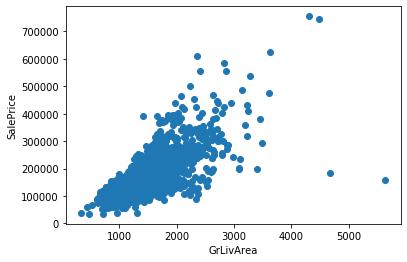

In [61]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

plt.scatter(houses['GrLivArea'], houses['SalePrice']);
plt.xlabel('GrLivArea');
plt.ylabel('SalePrice');

In [62]:
houses = houses.drop(houses[(houses['GrLivArea']>4000)& (houses['SalePrice']<300000)].index)
houses.shape

(1458, 81)

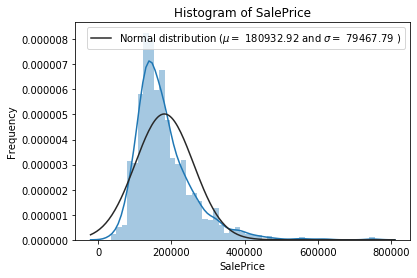

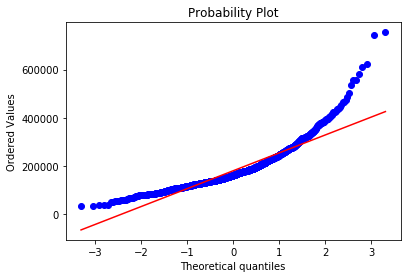

In [63]:
from scipy.stats import norm, skew, probplot
mu, sigma = norm.fit(houses['SalePrice'])
sns.distplot(houses['SalePrice'], fit=norm)
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');

fig = plt.figure()
res = probplot(houses['SalePrice'], plot=plt);

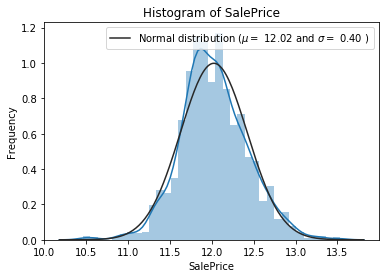

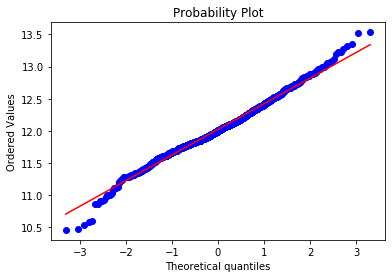

In [64]:
houses['SalePrice'] = np.log1p(houses['SalePrice'])

mu, sigma = norm.fit(houses['SalePrice'])
sns.distplot(houses['SalePrice'], fit=norm)
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');

fig = plt.figure()
res = probplot(houses['SalePrice'], plot=plt);


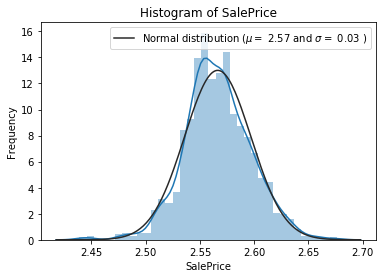

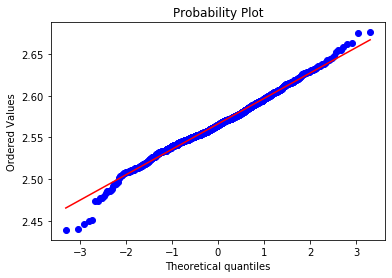

In [65]:
houses['SalePrice'] = np.log1p(houses['SalePrice'])

mu, sigma = norm.fit(houses['SalePrice'])
sns.distplot(houses['SalePrice'], fit=norm)
plt.legend(['Normal distribution ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc = 'best')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice');

fig = plt.figure()
res = probplot(houses['SalePrice'], plot=plt);


In [66]:
test = pd.read_csv('data/test.csv')
train_end = houses.shape[0]
entire = pd.concat([houses, test]).reset_index(drop=True)
entire.drop(['Id', 'SalePrice'], axis=1, inplace=True)
print ('Shape of the entire dataset is {}'.format(entire.shape))

Shape of the entire dataset is (2917, 79)


In [67]:
entire_na = (entire.isnull().sum()/entire.shape[0])*100 #get the percentage of NaN values for each feature
entire_na = entire_na[entire_na != 0].sort_values(ascending=False) #remove the  features that don't have any Nan values and sort in descending order  
entire_na.head()
nan_data = pd.DataFrame({'Nan Ratio': entire_na})
nan_data.head(20)

,Nan Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


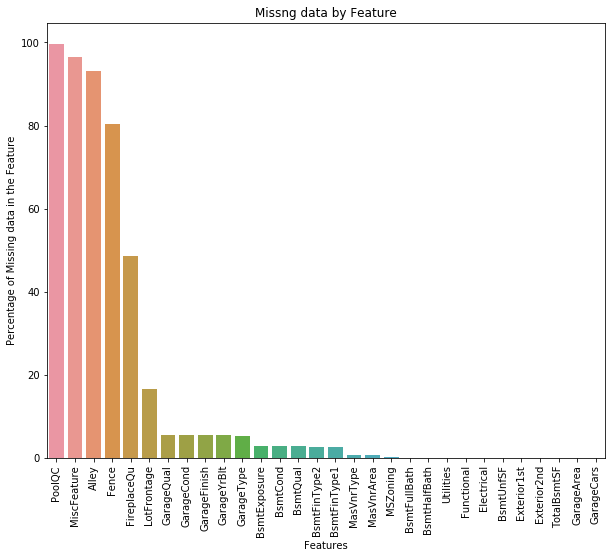

In [68]:
f, ax = plt.subplots(figsize=(10,8))
sns.barplot(x=nan_data.head(30).index, y=nan_data.head(30)['Nan Ratio'])
plt.xticks(rotation=90);
plt.ylabel('Percentage of Missing data in the Feature')
plt.xlabel('Features')
plt.title('Missng data by Feature');

In [69]:
#list of columns whose missing values are to be replaced with None
replace_with_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass']
for col in replace_with_none:
    entire[col].fillna('None', inplace=True)

#list of columns whose missing values are to be replaced with zero
replace_with_zero = ['GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'] 
for col in replace_with_zero:
    entire[col].fillna(0, inplace=True)

In [70]:
#list of columns whose missing values are to be replaced with the mode
replace_with_mode = ['MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
for col in replace_with_mode:
    entire[col].fillna(entire[col].mode()[0], inplace=True)
  

In [71]:
entire.loc[:,'LotFrontage'] = entire.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [72]:
entire['Functional'].fillna('Typ', inplace= True)


In [73]:
entire.drop('Utilities', axis=1, inplace=True)


In [74]:
entire_na = (entire.isnull().sum()/entire.shape[0])*100 #get the percentage of NaN values for each feature
entire_na = entire_na[entire_na != 0].sort_values(ascending=False) #remove the  features that don't have any Nan values and sort in descending order  
entire_na.head()
nan_data = pd.DataFrame({'Nan Ratio': entire_na})
nan_data

,Nan Ratio


In [75]:
for col in ['MSSubClass', 'OverallCond', 'YrSold', 'MoSold']:
    entire.loc[:, col] = entire[col].astype(str)

In [76]:
entire['TotalSF'] = entire['TotalBsmtSF'] + entire['1stFlrSF'] + entire['2ndFlrSF']


In [77]:
numerical = entire.dtypes[entire.dtypes != 'object'].index

skewness = entire[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skewness': skewness})
skewness_df.head(10)

,Skewness
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [78]:
(abs(skewness) > 0.75).value_counts()

True     21
False    12
dtype: int64

In [79]:
from scipy.special import boxcox1p

boxcox_features = skewness_df[np.abs(skewness_df['Skewness'])>0.75].index
lam = 0.15

for col in boxcox_features:
    entire.loc[:, col] = boxcox1p(entire[col], lam)

In [80]:
skewness2 = entire[numerical].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

skewness_df2 = pd.DataFrame({'Skewness': skewness2})
skewness_df2.head(10)

,Skewness
PoolArea,15.759529
3SsnPorch,8.921650
LowQualFinSF,8.741030
MiscVal,5.594963
BsmtHalfBath,3.786685
KitchenAbvGr,3.697303
ScreenPorch,2.977052
BsmtFinSF2,2.563235
EnclosedPorch,2.024321
TotRmsAbvGrd,0.749232


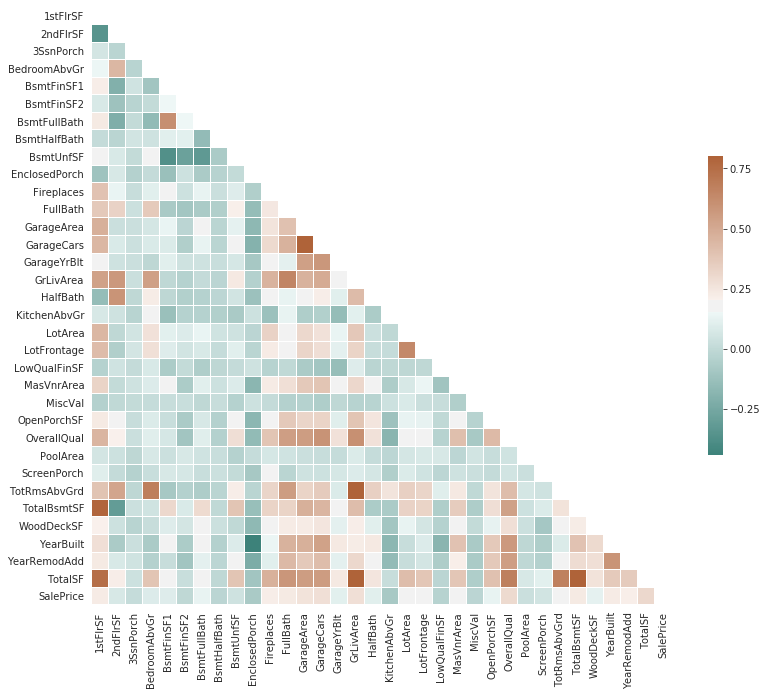

In [81]:
train= pd.concat([entire.iloc[:train_end, :], houses['SalePrice']], axis=1)
train_corr = train.corr()

mask = np.zeros_like(train_corr)
mask[np.triu_indices_from(mask)]=True

cmap = sns.diverging_palette(180, 30, as_cmap=True)
with sns.axes_style("white"):
    fig, ax = plt.subplots(figsize=(13,11))
    sns.heatmap(train_corr, vmax=.8, mask=mask, cmap=cmap, cbar_kws={'shrink':.5}, linewidth=.01);

In [82]:
dummy_entire = pd.get_dummies(entire)


In [83]:
train = dummy_entire.iloc[:train_end, :]
test  = dummy_entire.iloc[train_end:, :]

In [84]:
y_train = houses['SalePrice'].values

ridge_results = cross_val_score(RidgeCV(), train.values, y_train, cv=kfold, scoring= 'neg_mean_squared_error')
lasso_results = cross_val_score(LassoCV(), train.values, y_train, cv=kfold, scoring= 'neg_mean_squared_error')
rf_30_results = cross_val_score(RandomForestRegressor(n_estimators=30), train.values, y_train, cv=kfold, scoring= 'neg_mean_squared_error')
rf_100_results = cross_val_score(RandomForestRegressor(n_estimators=100), train.values, y_train, cv=kfold, scoring= 'neg_mean_squared_error')

print ('RMSE for Ridge regression is %.3f\n' % np.sqrt(np.abs(ridge_results.mean())))
print ('RMSE for Lasso regression is %.3f\n' % np.sqrt(np.abs(lasso_results.mean())))
print ('RMSE for Random Forest regression with 30 trees is %.3f\n' % np.sqrt(np.abs(rf_30_results.mean())))
print ('RMSE for Random Forest regression with 100 trees  is %.3f' % np.sqrt(np.abs(rf_100_results.mean())))

RMSE for Ridge regression is 0.009

RMSE for Lasso regression is 0.015

RMSE for Random Forest regression with 30 trees is 0.011

RMSE for Random Forest regression with 100 trees  is 0.011


In [85]:
model_f = RidgeCV()
cvs = cross_val_score(model_f, train.values, y_train, cv=kfold, scoring= 'neg_mean_squared_error')
np.sqrt(np.abs(cvs.mean()))

0.008675261886723955

In [90]:
test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
1458,11.818680,0.000000,0.0,2,10.105326,7.397498,0.0,0.000000,8.780689,0.0,...,0,0,1,0,1,0,0,0,0,1
1459,12.943735,0.000000,0.0,3,11.901094,0.000000,0.0,0.000000,9.752379,0.0,...,0,0,1,0,1,0,0,0,0,1
1460,11.916131,11.151348,0.0,3,11.476685,0.000000,0.0,0.000000,7.293500,0.0,...,0,0,1,0,1,0,0,0,0,1
1461,11.910125,11.062536,0.0,3,10.749651,0.000000,0.0,0.000000,9.207511,0.0,...,0,0,1,0,1,0,0,0,0,1
1462,12.833625,0.000000,0.0,2,8.720170,0.000000,0.0,0.000000,12.172900,0.0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,10.496872,10.496872,0.0,3,0.000000,0.000000,0.0,0.000000,10.496872,0.0,...,0,0,1,0,1,1,0,0,0,0
2913,10.496872,10.496872,0.0,3,8.622254,0.000000,0.0,0.000000,8.978567,0.0,...,0,0,1,0,1,1,0,0,0,0
2914,12.703313,0.000000,0.0,4,12.703313,0.000000,1.0,0.000000,0.000000,0.0,...,0,0,1,0,1,1,0,0,0,0
2915,12.039794,0.000000,0.0,3,9.301176,0.000000,0.0,0.730463,10.630386,0.0,...,0,0,1,0,1,1,0,0,0,0


In [91]:
test__ = pd.read_csv('data/test.csv')
test__

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [92]:
len(y_train)

1458

In [89]:
test

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_New,SaleType_Oth,SaleType_WD,Street_Grvl,Street_Pave,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
1458,11.818680,0.000000,0.0,2,10.105326,7.397498,0.0,0.000000,8.780689,0.0,...,0,0,1,0,1,0,0,0,0,1
1459,12.943735,0.000000,0.0,3,11.901094,0.000000,0.0,0.000000,9.752379,0.0,...,0,0,1,0,1,0,0,0,0,1
1460,11.916131,11.151348,0.0,3,11.476685,0.000000,0.0,0.000000,7.293500,0.0,...,0,0,1,0,1,0,0,0,0,1
1461,11.910125,11.062536,0.0,3,10.749651,0.000000,0.0,0.000000,9.207511,0.0,...,0,0,1,0,1,0,0,0,0,1
1462,12.833625,0.000000,0.0,2,8.720170,0.000000,0.0,0.000000,12.172900,0.0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2912,10.496872,10.496872,0.0,3,0.000000,0.000000,0.0,0.000000,10.496872,0.0,...,0,0,1,0,1,1,0,0,0,0
2913,10.496872,10.496872,0.0,3,8.622254,0.000000,0.0,0.000000,8.978567,0.0,...,0,0,1,0,1,1,0,0,0,0
2914,12.703313,0.000000,0.0,4,12.703313,0.000000,1.0,0.000000,0.000000,0.0,...,0,0,1,0,1,1,0,0,0,0
2915,12.039794,0.000000,0.0,3,9.301176,0.000000,0.0,0.730463,10.630386,0.0,...,0,0,1,0,1,1,0,0,0,0


In [88]:
from sklearn.model_selection import cross_val_predict
predicts_ = cross_val_predict(RidgeCV(), test, y_train, cv = kfold)

ValueError: Found input variables with inconsistent numbers of samples: [1459, 1458]